In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [166]:
df = pd.read_csv("multiple_linear_regression_dataset.csv")
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


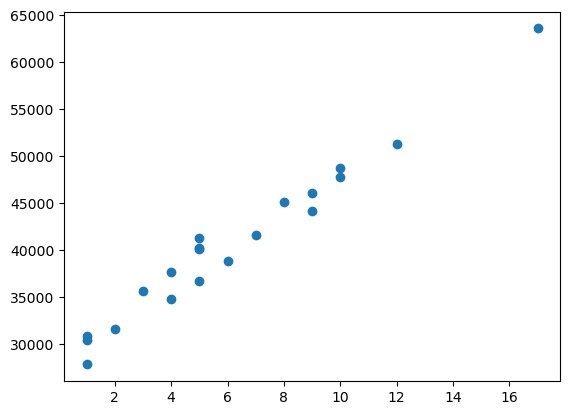

In [167]:
plt.scatter(df['experience'],df['income'])

In [168]:
w_init = np.array([10,20])
b_init = 5

x = np.array(df[['age','experience']])
y = np.array(df['income'])
prediksi = np.dot(x,w_init)+b_init

prediksi

array([275, 365, 515, 425, 635, 655, 385, 415, 475, 555, 315, 655, 645,
       595, 685, 535, 925, 255, 625, 575], dtype=int64)

In [169]:
prediksi.shape

(20,)

In [212]:
def mse(X,y,w,b):
    prediksi = np.dot(X,w)+b
    error = prediksi - y
    mse_val = (1/(2*X.shape[0]))*np.sum(error**2)
    return mse_val

In [222]:
mse(x,y,[-94,2100],30000)

1832283.2000000002

In [223]:
prediksi = np.dot(x,w_init)+b_init
prediksi.shape

(20,)

In [224]:
y.shape

(20,)

In [225]:
def compute_gradient(X,y,w,b):
    prediksi = np.dot(w,X.T)+b
    error = prediksi - y # (20,1)
    dj_dw = (1/X.shape[0])*np.dot(X.T,error)

    dj_db = (1/X.shape[0])*np.sum(error)
    return dj_dw,dj_db

In [226]:
dw,db=compute_gradient(x,y,w_init,b_init)

In [227]:
def gradient_descent(x,y,w_init,b_init,iter,alpha):
    w_baru = w_init
    b_baru = b_init
    history = []
    for i in range(iter):
        dj_dw,dj_db = compute_gradient(x,y,w_baru,b_baru)
        w_baru = w_baru - alpha * dj_dw
        b_baru = b_baru - alpha * dj_db
        loss = mse(x,y,w_baru,b_baru)
        history.append(loss)
        # if i % 1000==0:
            # print(f'Iterasi {i}: Loss = {loss}')
    print(f"Final Loss = {loss}, parameter = w : {w_baru}, b : {b_baru}")
    return history,w_baru,b_baru

In [228]:
iter = 100000
alpha = 0.001
w_init = np.array([10,20])
b_init = 5
hist,w,b=gradient_descent(x,y,w_init,b_init,iter,alpha)

Final Loss = 767487.3776681711, parameter = w : [ -94.88539302 2159.17348486], b : 31102.421495820206


In [229]:
prediksi = np.dot(x,w)+b
prediksi

array([30889.46015513, 34733.38015974, 30961.1549935 , 38861.95634342,
       48614.0844445 , 41377.48084573, 39241.49791551, 36607.89746554,
       38387.52937831, 44675.27904686, 30509.91858304, 46075.36938754,
       36774.47769693, 34899.96039114, 52837.5460212 , 40167.16129109,
       62305.01794321, 31079.23094117, 46360.02556661, 49183.39680263])

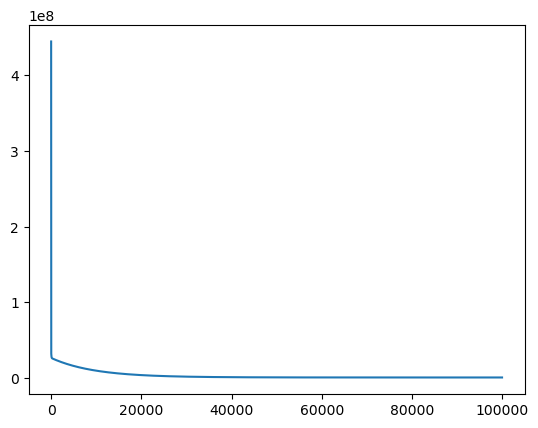